# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [9]:
# Code here
print(df_titanic["class"].unique())
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "restaurant staff": "crew",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})
df_titanic = df_titanic[df_titanic["type"] == "passenger"]

pd.crosstab(df_titanic["class"], df_titanic["embarked"])


['3rd' '2nd' '1st']


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

69.6% of third class passengers embarked at Southampton
54% of southampton passengers were in 3rd class

In [ ]:
# Code here
print(pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize="columns"))
print(pd.crosstab(df_titanic["class"], df_titanic["embarked"], normalize="index"))




embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

The pros are we can easily see trends and interesting values with visualization. We can also easily compare between different embark values. On the other hand we lose some precision and it can be misleading. For example only a few data points in one category can make the data seem more interesting then it actually is.

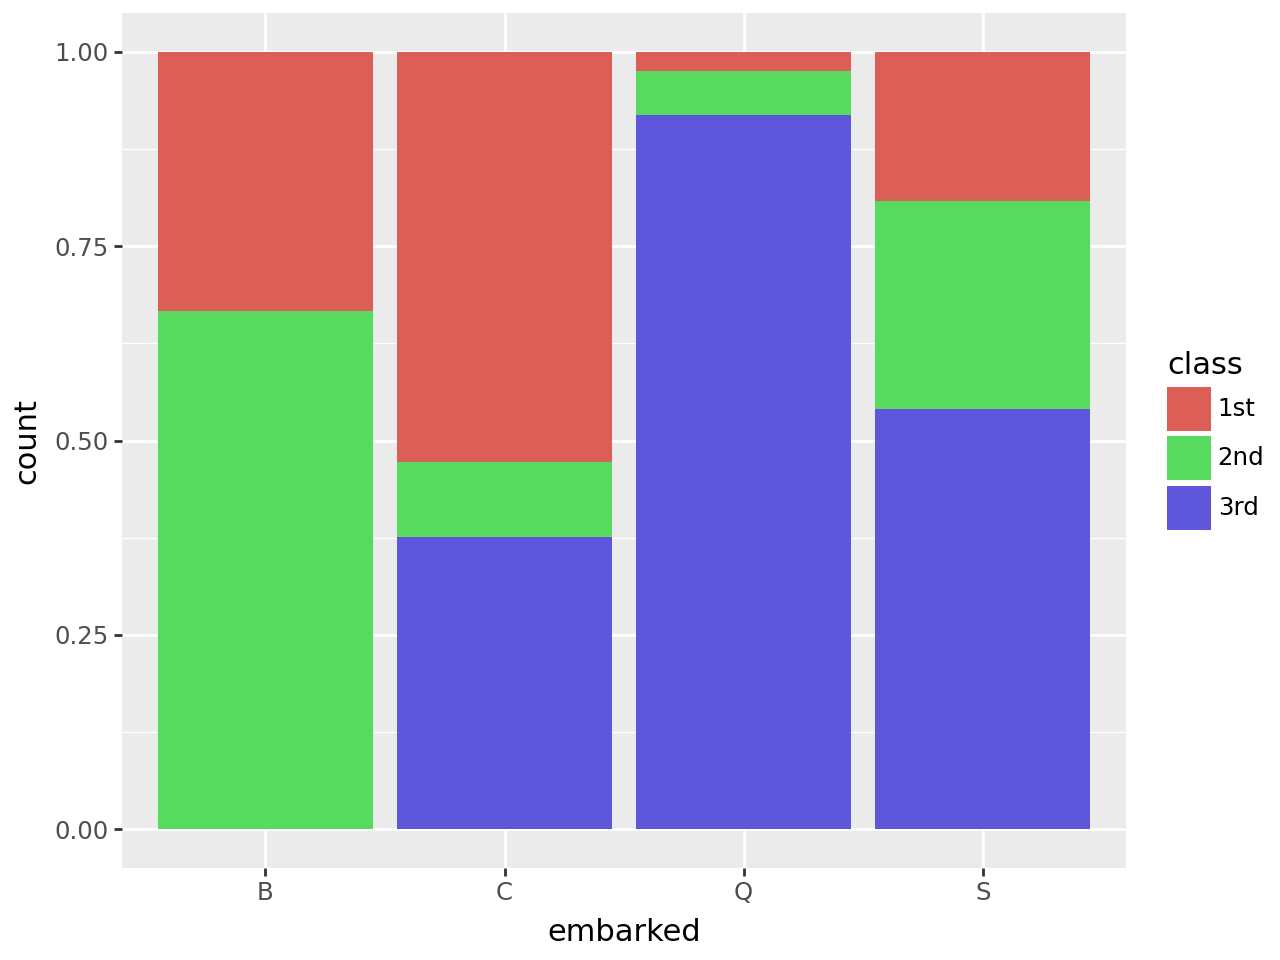

In [ ]:
# Code here
from plotnine import *

(
    ggplot(df_titanic, aes(x="embarked", fill="class"))
    + geom_bar(position="fill")
)
